# 一、导入全部库

In [2]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from gym.wrappers import GrayScaleObservation

from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecFrameStack

import os
import time
from matplotlib import pyplot as plt
import optuna
import numpy as np



# 二、创建环境

In [10]:
monitor_dir = r'./monitor_log/'
os.makedirs(monitor_dir,exist_ok=True)
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = Monitor(env,monitor_dir)

env = GrayScaleObservation(env,keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')


(1, 240, 256, 4)
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_get_all_attributes', '_get_indices', 'action_space', 'class_attributes', 'close', 'env_is_wrapped', 'env_method', 'get_attr', 'get_images', 'getattr_depth_check', 'getattr_recursive', 'metadata', 'n_stack', 'num_envs', 'observation_space', 'render', 'reset', 'seed', 'set_attr', 'stackedobs', 'step', 'step_async', 'step_wait', 'unwrapped', 'venv']


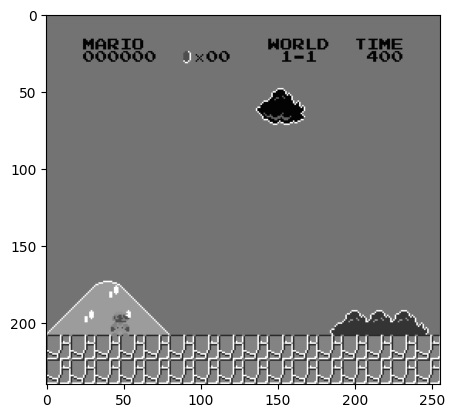

In [19]:
state = env.reset()
print(state.shape)
plt.imshow(state[0])
env.action_space.sample()
print(dir(env))
env

[[140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 ...
 [214 124 124 ... 124 124   0]
 [214 124 124 ... 124   0   0]
 [124   0   0 ...   0   0 124]]


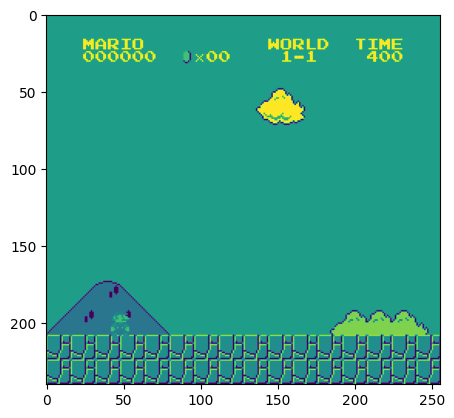

In [14]:
plt.imshow(state[0][:,:,3])
print((state[0][:,:,3]))

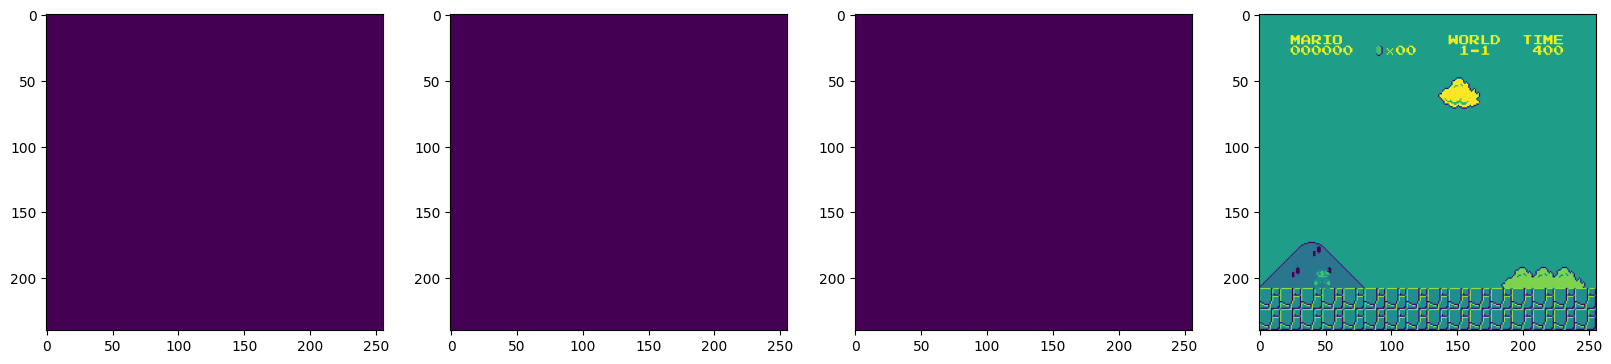

In [15]:
plt.figure(figsize=(20, 16))
for idx in range(state.shape[3]):
    plt.subplot(1, 4, idx + 1)
    plt.imshow(state[0][:,:,idx])
plt.show()